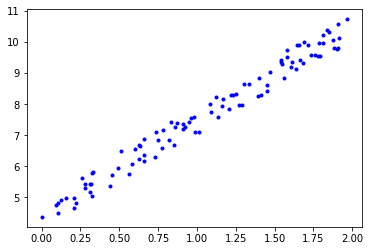

In [6]:
import numpy as np
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.plot(X,y, 'b.')

In [7]:
X_b = np.c_[np.ones((100, 1)), X] # 两列是因为第一列是常数项X0， 第二列是X1
X_b

array([[1.        , 1.90193223],
       [1.        , 0.32594273],
       [1.        , 1.87917631],
       [1.        , 1.75778984],
       [1.        , 0.73590565],
       [1.        , 1.80912317],
       [1.        , 0.33337661],
       [1.        , 1.33367825],
       [1.        , 1.29220723],
       [1.        , 1.30295707],
       [1.        , 0.62415071],
       [1.        , 0.96309222],
       [1.        , 1.13600553],
       [1.        , 1.90891168],
       [1.        , 1.65704946],
       [1.        , 0.4396655 ],
       [1.        , 0.50902936],
       [1.        , 1.85030668],
       [1.        , 0.31223366],
       [1.        , 1.69040261],
       [1.        , 0.92048706],
       [1.        , 0.87154382],
       [1.        , 0.2604239 ],
       [1.        , 1.54173134],
       [1.        , 0.09472445],
       [1.        , 1.87419873],
       [1.        , 1.60749881],
       [1.        , 1.0128063 ],
       [1.        , 0.4898988 ],
       [1.        , 1.47120644],
       [1.

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[4.45677979],
       [3.03190131]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.45677979],
       [10.52058241]])

In [19]:
X_new_b

array([[1., 0.],
       [1., 2.]])

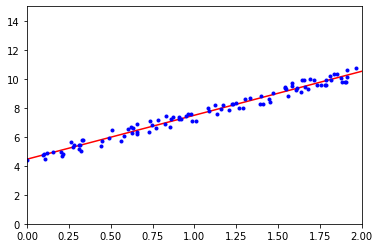

In [17]:
plt.plot(X_new, y_predict, "r-") # 输出的其实是两个点，但由于参数r-，所以连成了一条线
plt.plot(X, y,"b.")
plt.axis([0,2, 0, 15])
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ # 第一个是截距，第二个是各个X的系数

(array([4.45677979]), array([[3.03190131]]))

In [20]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [21]:
theta

array([[4.45677979],
       [3.03190131]])

In [25]:
X_b.shape

(100, 2)

In [44]:
n_epchos = 50

t0, t1 = 5, 50
s = 0
def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epchos):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # 为了保证是二维数组 切片取一行 即一个样本
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradients
        s += 1
print(s)

5000


In [43]:
random_index = np.random.randint(m)
random_index
#print(X_b[0:1])
print(X_b[0:2].shape)
print(X_b.shape)
print(y.shape)

(2, 2)
(100, 2)
(100, 1)


In [47]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 50, penalty =None, eta0 = 0.1)
sgd_reg.fit(X,y)

C:\software_program\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [48]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.44482075]), array([3.04368666]))

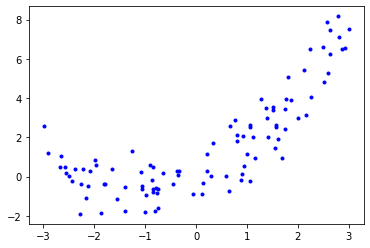

In [50]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X +np.random.randn(m,1)

plt.plot(X,y, 'b.')

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 4, include_bias = False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([ 2.79630891,  7.81934349, 21.86529985, 61.14213268])

In [55]:
X[0]

array([2.79630891])

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.02685736]), array([[1.08621844, 0.49697992]]))

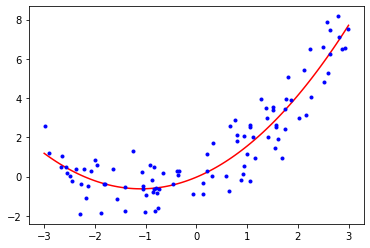

In [63]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)


plt.plot(X_new, y_new, "r-")
plt.plot(X,y,'b.')
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 2, label = "val")
    plt.legend()
        
    

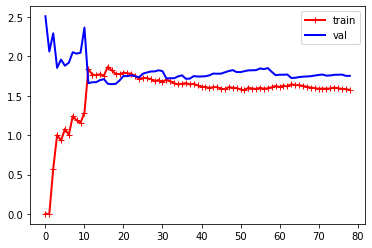

In [67]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

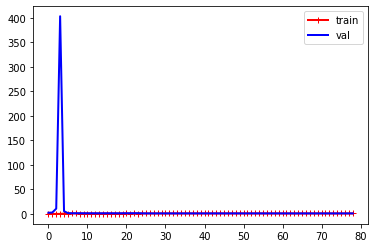

In [83]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree = 3, include_bias = False))
                                ,("sgd_reg", LinearRegression())])

plot_learning_curves(polynomial_regression, X, y)

In [84]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[3.10973646]])

In [87]:
sgd_reg = SGDRegressor(penalty ="l2")
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

C:\software_program\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.10036355])

In [88]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([3.06785582])

In [89]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])


array([3.06565282])

In [ ]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter = 1, warm_start)

In [90]:
minimum_val_error = float("inf")
minimum_val_error

inf

In [111]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [112]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

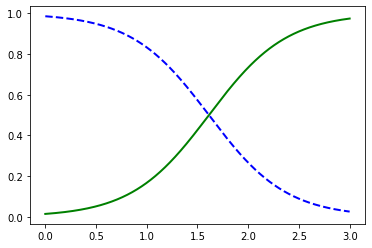

In [115]:
#X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
#plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris-Virginica")
#plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris-Virginica")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

In [106]:
y_proba.shape

(1000, 2)

In [142]:
log_reg.predict_proba([[1.7], [1.5]])

array([[0.44316529, 0.55683471],
       [0.57328164, 0.42671836]])

In [138]:
iris["data"][:,0:1].shape

(150, 1)

In [143]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
softmax_reg.predict([[5,2]])

array([2])

In [147]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])